# Learning Activation Function 

In [ ]:
pip install keras

In [5]:
from keras.models import Sequential

C:\Users\pc\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\pc\miniconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\pc\miniconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [3]:
import keras

In [7]:
from keras.layers import Dense, Activation, Dropout

In [9]:
from keras.optimizers import SGD

In [1090]:
#Import libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [221]:
def weights_init(layers_dim):
    params = {}
    
    n = len(layers_dim)
    for i in range(1, n):
        params['W' + str(i)] = np.random.randn(layers_dim[i], layers_dim[i-1])*0.01
        params['b' + str(i)] = np.zeros((layers_dim[i], 1))
    return params

#### définir la fonction d'activation Relu et sigmoid

In [222]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))


def relu(x):
    return np.maximum(x, 0)

In [223]:
int(len(params)/2)

3

In [1192]:
def forward(X, params):
    # intermediate layer use relu as activation
    # last layer use sigmoid
    n_layers = int(len(params)/2)
    A = X
    cache = {}
    for i in range(1, n_layers):
        W, b = params['W'+str(i)], params['b'+str(i)]
        Z = np.dot(W, A) + b
        A = relu(Z)
        cache['Z'+str(i)] = Z
        cache['A'+str(i)] = A
    
    # last layer
    W, b = params['W'+str(i+1)], params['b'+str(i+1)]
    Z = np.dot(W, A) + b
    A = sigmoid(Z)
    cache['Z'+str(i+1)] = Z
    cache['A'+str(i+1)] = A
    
    return cache, A 

2

#### Cost function

In [1191]:
def compute_cost(A, Y):
    """
    For binary classification, both A and Y would have shape (1, m), where m is the batch size
    """
    assert A.shape == Y.shape
    m = A.shape[1]
    s = np.dot(Y, np.log(A.T)) + np.dot(1-Y, np.log((1 - A).T))
    loss = -s/m
    return np.squeeze(loss)

In [1190]:
def sigmoid_grad(A, Z):
    grad = np.multiply(A, 1-A)
    return grad


def relu_grad(A, Z):
    grad = np.zeros(Z.shape)
    grad[Z>0] = 1
    return grad

In [1189]:

def backward(params, cache, X, Y):
    """
    params: weight [W, b]
    cache: result [A, Z]
    Y: shape (1, m)
    """
    grad = {}
    n_layers = int(len(params)/2)
    m = Y.shape[1]
    cache['A0'] = X
    
    for l in range(n_layers, 0, -1):
        A, A_prev, Z = cache['A' + str(l)], cache['A' + str(l-1)], cache['Z' + str(l)]
        W = params['W'+str(l)]

        if l == n_layers:
            dA = -np.divide(Y, A) + np.divide(1 - Y, 1 - A)
        
        if l == n_layers:
            dZ = np.multiply(dA, sigmoid_grad(A, Z))
        else:
            dZ = np.multiply(dA, relu_grad(A, Z))
            
        dW = np.dot(dZ, np.transpose(A_prev))/m
        db = np.sum(dZ, axis=1)/m
        dA = np.dot(np.transpose(W), dZ)
        dq=

        grad['dW'+str(l)] = dW
        grad['db'+str(l)] = db
    
    return grad

In [228]:
def optimize(params, grads, lr):
    n_layers = int(len(params)/2)
    for i in range(1, n_layers+1):
        dW, db = grads['dW'+str(i)], grads['db'+str(i)]
        params['W'+str(i)] -= lr*dW
        params['b'+str(i)] -= lr*db
    return params

In [346]:
from sklearn import datasets


X, y = datasets.make_classification(n_samples=10000, n_features=200, random_state=123)

X_train, X_test = X[:8000], X[8000:]
y_train, y_test = y[:8000], y[8000:]

print('train shape', X_train.shape)
print('test shape', X_test.shape)

train shape (8000, 200)
test shape (2000, 200)


In [328]:
print('train shape', y_train.shape)
print('test shape', y_test.shape)

train shape (8000,)
test shape (2000,)


#### training section

In [912]:
layers_dim=[15,3,1]

In [913]:
params=weights_init(layers_dim)

In [910]:
params

{'W1': array([[ 0.0043022 ,  0.00106707,  0.00543851, ..., -0.01008173,
         -0.00112258,  0.01251849],
        [ 0.01791409, -0.02206366, -0.00334426, ..., -0.01108985,
          0.01534285,  0.00042779],
        [ 0.00600791, -0.0063054 , -0.01342683, ...,  0.00581413,
          0.0009161 , -0.00054141],
        ...,
        [ 0.0138549 ,  0.00554894, -0.00152285, ...,  0.00447418,
          0.00814407,  0.02881155],
        [ 0.00401969,  0.00492829,  0.00167842, ...,  0.02033159,
          0.01314183, -0.00227516],
        [ 0.00866159,  0.00408372,  0.0116309 , ...,  0.00459486,
          0.00838906, -0.00750341]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[-8.48567246e-03, -3.63015834e-03,  5.58106814e-03,
         -7.0

In [914]:
cache, A=forward(np.transpose(X_train), params) 

In [915]:
cache

{'Z1': array([[ 0.01221776, -0.01425465,  0.02529998, ...,  0.01191269,
         -0.03091645, -0.01636023],
        [ 0.00339242,  0.03969722, -0.0383831 , ...,  0.02829159,
          0.00106787, -0.05053275],
        [-0.04770356,  0.02095691,  0.0266032 , ..., -0.00458842,
         -0.05058123, -0.02211864]]),
 'A1': array([[0.01221776, 0.        , 0.02529998, ..., 0.01191269, 0.        ,
         0.        ],
        [0.00339242, 0.03969722, 0.        , ..., 0.02829159, 0.00106787,
         0.        ],
        [0.        , 0.02095691, 0.0266032 , ..., 0.        , 0.        ,
         0.        ]]),
 'Z2': array([[ 1.00666965e-04, -5.20466188e-04,  4.20960393e-05,
         -2.57975137e-04,  1.31622852e-04,  1.66643160e-04,
          4.61409086e-04,  0.00000000e+00, -6.43090700e-05,
          6.79574589e-05, -1.29461536e-04,  0.00000000e+00,
         -2.89694363e-04, -3.23907083e-04, -7.20596270e-04,
         -1.79616237e-04, -7.84970547e-04,  4.01817940e-04,
          2.57656959e-04

In [349]:
y_train=np.asmatrix(y_train)

In [350]:
y_train.shape

(1, 8000)

In [235]:
A.shape

(1, 8000)

In [241]:
compute_cost(A, y_train)

matrix([[0.69315116]])

In [242]:
grads=backward(params, cache, np.transpose(X_train), y_train)

In [243]:
grads['dW3'].shape

(1, 10)

In [244]:
np.sum([1,2,3])

6

In [139]:
X_train.shape

(8000, 200)

In [162]:
new_params=optimize(params, grads, 0.1)

In [163]:
new_params

{'W1': array([[-0.00770969, -0.00801298, -0.01510181, ...,  0.00660373,
         -0.00980811,  0.01325709],
        [ 0.01279133, -0.01775942, -0.01614006, ..., -0.00054877,
          0.00505021,  0.00871716],
        [ 0.00431515,  0.01380703,  0.00031775, ...,  0.01935857,
          0.00430617,  0.01498161],
        ...,
        [-0.01290487, -0.00081428, -0.00939996, ..., -0.00551834,
          0.00999985, -0.00798544],
        [-0.00979182, -0.02037665,  0.00476198, ..., -0.00379501,
         -0.01960572,  0.01561951],
        [ 0.00468323, -0.00840485, -0.01923839, ...,  0.00178517,
         -0.00117928,  0.00396719]]),
 'b1': array([[-2.02725734e-07],
        [ 2.73375691e-09],
        [-1.79825854e-07],
        [-5.29081662e-07],
        [-4.04032679e-08],
        [ 4.46228647e-07],
        [-1.18136665e-07],
        [-3.76020064e-07],
        [-2.47848296e-07],
        [-9.02150513e-08],
        [-2.08959160e-07],
        [-4.16625300e-09],
        [-1.34347707e-07],
        [ 

In [164]:
cache, A=forward(np.transpose(X_train), params) 

In [165]:
compute_cost(A, y_train)

matrix([[0.69314988]])

### Algorithme Backpropagation

In [1193]:
Loss=[]

In [1194]:
P=weights_init([15,3,1])

In [1195]:
len(P)

4

In [1196]:
for i in range(1000):
    cache, A=forward(np.transpose(X_train),P)
    grads=backward(P,cache,np.transpose(X_train),y_train)
    P=optimize(P,grads,0.1)
    Loss.append(compute_cost(A, y_train))
               
   

In [1302]:
Loss=np.asarray(Loss)

In [1198]:
P

{'W1': array([[ 0.12248823,  0.00465585, -0.01152116,  0.0464989 ,  0.01892799,
          0.09968819, -0.05510195, -0.0530088 , -0.09050292,  0.00307556,
         -0.02500471,  0.54520276, -0.06287007,  0.11431964,  0.05049843],
        [-0.01502529,  0.08676132,  0.05857406,  0.0254139 , -0.00592419,
          0.07132067, -0.15030262, -0.03920749, -0.13282883,  0.0389946 ,
         -0.08650598,  0.54143852, -0.12361684,  0.10659569,  0.06164594],
        [ 0.00499947,  0.03718026,  0.05047363,  0.04814244, -0.06152806,
          0.06000723, -0.20074851, -0.12812786, -0.31069437,  0.01389602,
          0.13789544,  0.79563395, -0.21185185,  0.09447727,  0.01813333]]),
 'b1': array([[0.51703954],
        [0.54868245],
        [0.91810227]]),
 'W2': array([[0.79041693, 0.83097735, 1.30932218]]),
 'b2': array([[-2.05450435]])}

In [843]:
Loss.shape

(1000, 1, 1)

#### Draw loss function

In [1276]:
x=[]

In [1277]:
for i in range(0,1000):
    x.append(i)

In [1278]:
np.asarray(x).shape

(1000,)

In [1279]:
y=[]

In [1280]:
for i in range(0,1000):
    y.append(Loss[i,0])


In [1281]:
np.asarray(y).shape

(1000, 1)

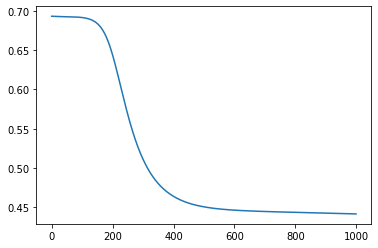

In [850]:
plt.plot(x,y)

In [723]:
P['W1'].shape

(3, 15)

In [724]:
cache_pred, y_pred=forward(np.transpose(X_test),P)

In [725]:
y_pred.shape

(1, 218)

In [726]:
y_test.shape

(1, 218)

### F1-Score  accuarcy

In [ ]:
n=y_test.shape[1]
TP=0
FN=0
FP=0

for i in range(n):
    if (y_pred[0,i]>0.5) and (y_test[0,i]==1):
        TP=TP+1
for i in range(n):
    if (y_pred[0,i]<=0.5) and (y_test[0,i]==1):
        FN=FN+1
for i in range(n):
    if (y_pred[0,i]>0.5) and (y_test[0,i]==0):
        FP=FP+1
precision=TP/(TP+FP)
recall=TP/(TP+FN)
F1=(2*precision*recall)/(precision+recall)
F1

In [273]:
np.transpose(X_train).shape[0]

200

In [332]:
X_train.shape[0]

8000

In [335]:
np.transpose(y_train).shape[0]

8000

## 2. Application on dataset

In [643]:
dt=pd.read_csv("C:/Users/pc/Desktop/bank.csv",delimiter=";")

In [644]:
dt.shape

(1087, 16)

In [645]:
dt.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
y            object
dtype: object

In [646]:
dt['y'].replace(to_replace=['yes','no'], value=[1,0], inplace=True)

In [647]:
dt.groupby(['contact'])['y'].value_counts(normalize=True)

contact    y
cellular   1    0.550993
           0    0.449007
telephone  1    0.536585
           0    0.463415
unknown    0    0.756000
           1    0.244000
Name: y, dtype: float64

In [648]:
dt["job"]=dt["job"].astype('category')
dt["job"]=dt["job"].cat.codes

In [649]:
dt["marital"]=dt["marital"].astype('category')
dt["marital"]=dt["marital"].cat.codes

In [650]:
dt["education"]=dt["education"].astype('category')
dt["education"]=dt["education"].cat.codes

In [651]:
dt["default"]=dt["default"].astype('category')
dt["default"]=dt["default"].cat.codes

In [652]:
dt["housing"]=dt["housing"].astype('category')
dt["housing"]=dt["housing"].cat.codes

In [653]:
dt["loan"]=dt["loan"].astype('category')
dt["loan"]=dt["loan"].cat.codes

In [654]:
dt["contact"]=dt["contact"].astype('category')
dt["contact"]=dt["contact"].cat.codes

In [656]:
dt["month"]=dt["month"].astype('category')
dt["month"]=dt["month"].cat.codes

In [657]:
dt.dtypes

age          int64
job           int8
marital       int8
education     int8
default       int8
balance      int64
housing       int8
loan          int8
contact       int8
day          int64
month         int8
duration     int64
campaign     int64
pdays        int64
previous     int64
y            int64
dtype: object

In [658]:
X=dt[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous']]

In [659]:
y=dt['y']

In [660]:
from  sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [661]:
X=StandardScaler().fit_transform(X)

In [662]:
# Split data to train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [663]:
X_train.shape

(869, 15)

In [664]:
y_train=np.asmatrix(y_train)

In [665]:
y_train.shape

(1, 869)

## 3. Learning Activation Function

In [1468]:
def weights_init2(layers_dim):
    params = {}
    
    n = len(layers_dim)
    params['q'] = np.random.randn(1, 3)*0.01
    for i in range(1, n):
        params['W' + str(i)] = np.random.randn(layers_dim[i], layers_dim[i-1])*0.01
        params['b' + str(i)] = np.zeros((layers_dim[i], 1))
        
    return params

In [1447]:
A=[[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3]]
B=[2,0,2]
np.multiply(np.transpose(B),A)

array([[2, 0, 6],
       [2, 0, 6],
       [2, 0, 6],
       [2, 0, 6],
       [2, 0, 6]])

In [1469]:
def sigmoid2(x):
    return 1/(1 + np.exp(-np.multiply(q,x)))

In [1470]:
def forward2(X, params):
    # intermediate layer use relu as activation
    # last layer use sigmoid
    n_layers = int(len(params)/2)
    A = X
    cache = {}
    for i in range(1, n_layers):
        W, b = params['W'+str(i)], params['b'+str(i)]
        Z = np.dot(W, A) + b
        A = relu(Z)
        cache['Z'+str(i)] = Z
        cache['A'+str(i)] = A
    
    # last layer
    W, b = params['W'+str(i+1)], params['b'+str(i+1)]
    Z = np.dot(W, A) + b
    Z=np.multiply(np.transpose(params['q']),Z)
    A = sigmoid(Z)
    cache['Z'+str(i+1)] = Z
    cache['A'+str(i+1)] = A
    
    return cache, A 

In [1471]:
def compute_cost2(A, Y):
    """
    For binary classification, both A and Y would have shape (1, m), where m is the batch size
    """
    assert A.shape == Y.shape
    m = A.shape[1]
    s = np.dot(Y, np.log(A.T)) + np.dot(1-Y, np.log((1 - A).T))
    loss = -s/m
    return np.squeeze(loss)


In [1411]:
def sigmoid_grad2(A, Z, s):
    grad =s*np.multiply(A, 1-A)
    return grad

In [1472]:
def backward2(params, cache, X, Y):
    """
    params: weight [W, b]
    cache: result [A, Z]
    Y: shape (1, m)
    """
    grad = {}
    n_layers = int(len(params)/2)
    m = Y.shape[1]
    cache['A0'] = X
    
    for l in range(n_layers, 0, -1):
        A, A_prev, Z = cache['A' + str(l)], cache['A' + str(l-1)], cache['Z' + str(l)]
        W = params['W'+str(l)]

        if l == n_layers:
            dA = -np.divide(Y, A) + np.divide(1 - Y, 1 - A)
        
        if l == n_layers:
            dZ = np.multiply(dA, sigmoid_grad(A, Z))
        else:
            dZ = np.multiply(dA, relu_grad(A, Z))
            
        dW = np.dot(dZ, np.transpose(A_prev))/m
        db = np.sum(dZ, axis=1)/m
        dA = np.dot(np.transpose(W), dZ)
       

        grad['dW'+str(l)] = dW
        grad['db'+str(l)] = db
        
    
    return grad

In [1474]:
def optimize2(params, grads, lr):
    n_layers = int(len(params)/2)
    params['q'] = params['q'] +lr
    for i in range(1, n_layers+1):
        dW,db = grads['dW'+str(i)], grads['db'+str(i)]
        params['W'+str(i)] -= lr*dW
        params['b'+str(i)] -= lr*db
        
    return params

### Deep learning with Activation function learning

In [1475]:
Loss=[]

In [1476]:
P=weights_init2([15,3,1])

In [1422]:
q=abs(np.random.randn())

In [1462]:
P['q']

array([[-0.0055759 , -0.01404877, -0.01433842]])

In [1477]:
P['q'][0,0]

0.014455633348122159

In [1478]:
for i in range(600):
    cache, A=forward2(np.transpose(X_train),P)
    grads, dq=backward2(P,cache,np.transpose(X_train),y_train)
    P=optimize2(P,grads,0.1)
    Loss.append(compute_cost(A, y_train))

ValueError: shapes (3,1) and (3,869) not aligned: 1 (dim 1) != 3 (dim 0)

In [1425]:
cache, A=forward2(np.transpose(X_train),P,q)

ValueError: shapes (15,3) and (1,869) not aligned: 3 (dim 1) != 1 (dim 0)

In [1158]:
grad=backward2(P,cache,np.transpose(X_train),y_train)

In [1164]:
grad

{'dW2': matrix([[0.00221722, 0.00067231, 0.0008522 ],
         [0.0022172 , 0.00067229, 0.0008522 ],
         [0.00221724, 0.00067233, 0.00085221]]),
 'db2': matrix([[0.01438448],
         [0.01438386],
         [0.01438502]]),
 'dq2': matrix([[-0.02374671, -0.02374671, -0.02374671]])}

In [1211]:
cache, A=forward2(np.transpose(X_train),P)

In [1377]:
q

120.1094375923309

In [1310]:
cache_pred, y_pred=forward2(np.transpose(X_test),P,q)

In [1366]:
Loss=np.asarray(Loss)

In [1367]:
x=[]
for i in range(0,600):
    x.append(i)

In [1368]:
y=[]
for i in range(0,600):
    y.append(Loss[i,0])

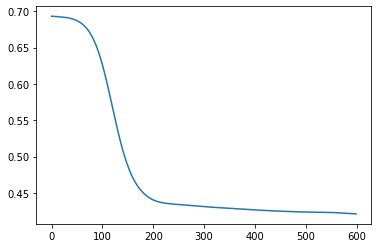

In [1369]:
plt.plot(x,y)

In [1376]:
n=y_test.shape[1]
TP=0
FN=0
FP=0

for i in range(n):
    if (y_pred[0,i]>0.5) and (y_test[0,i]==1):
        TP=TP+1
for i in range(n):
    if (y_pred[0,i]<=0.5) and (y_test[0,i]==1):
        FN=FN+1
for i in range(n):
    if (y_pred[0,i]>0.5) and (y_test[0,i]==0):
        FP=FP+1
precision=TP/(TP+FP)
recall=TP/(TP+FN)
F1=(2*precision*recall)/(precision+recall)
F1

0.7596153846153847